Coding the bot:
1. You will modify MyBot.cpp to return a valid move whenever the function play is called. The source ﬁle is located at (./bots/MyBot).
2. All other source ﬁles are to be left untouched.
3. The Makeﬁle is also provided at this location. Use it to generate a .so ﬁle by executing the command make from the location ./bots/MyBot.
4. You can test your bot against another bot by executing the command “./bin/Desdemona ./<path to bot1.so> ./<path to bot2.so>”
5. By convention, the ﬁrst bot is BLACK and the second RED.
6. A random bot (./bots/RandomBot) has been provided for testing.
7. At the end of the game, a game.log ﬁle is created that contains the sequence of moves made.
8. The bots being submitted must have NO print statements.
9. If a bot returns an invalid move, it will be disqualiﬁed.
Helper Functions:
The following functions have already been written to assist you: • bool OthelloBoard::validateMove( Turn turn, int x, int y ) Returns true if the passed move (x,y) is valid for the passed turn, false otherwise. • bool OthelloBoard::validateMove( Turn turn, Move move ) Returns true if the passed move is valid for the passed turn, false otherwise.


Time constraints:
Each bot can take at most 2 seconds to return a move. If this time limit is exceeded, the bot causing the timeout will be disqualiﬁed

Submissions:

• Trial Round: Upload a single .so ﬁle with the name <GROUPNO>.so or <ROLLNO>.so (eg: 23.so or CS17B001.so) 

• Final Round: Upload a zip ﬁle containing your source code(i.e MyBot.cpp), report as well as the <GROUPNO>.so ﬁle. The zip ﬁle should be named as <GROUPNO>.zip or <ROLLNO>.zip (e.g 23.zip or CS17B001.zip)


# **FUNCTIONS**


• void OthelloBoard::makeMove( Turn turn, int x, int y ) Updates the board conﬁguration by making the move (x,y); throws an exception if the move is not valid.

• void OthelloBoard::makeMove( Turn turn, Move move ) Updates the board conﬁguration by making the speciﬁed move; throws an exception if the move is not valid. 

• list<Move> OthelloBoard::getValidMoves( Turn turn ) Returns a list of valid moves that can be made given the turn. 

• int OthelloBoard::getBlackCount() Returns the number of black coins on the board. 

• int OthelloBoard::getRedCount() Returns the number of red coins on the board. 

• void OthelloBoard::print( Turn turn ) Prints the turn, the board conﬁguration, and the number of black and red coins. ’X’ is BLACK, ’O’ is RED, and unﬁlled locations are blank.


https://www.wikihow.com/Play-Othello

Place 4 discs in the center of the board so that 2 are black side up and 2 are white side up. Arrange the discs with the matching colors diagonal to each other.

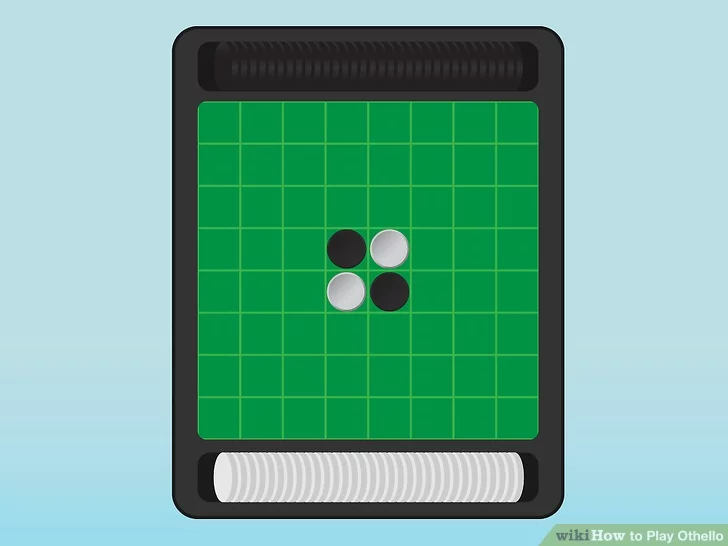


Distribute the remaining discs evenly between you and your opponent. Each player should have 30 of the remaining discs


Place the first disc in a spot that surrounds an opponent’s disc. This is also known as “outflanking” in Othello. A “row” consists of one or more discs that form a line horizontally, vertically, or diagonally.

For example, if the opponent has a disc next to 1 of your discs in a vertical row, then place a disc on the open side of their disc in the same row to outflank your opponent’s disc.

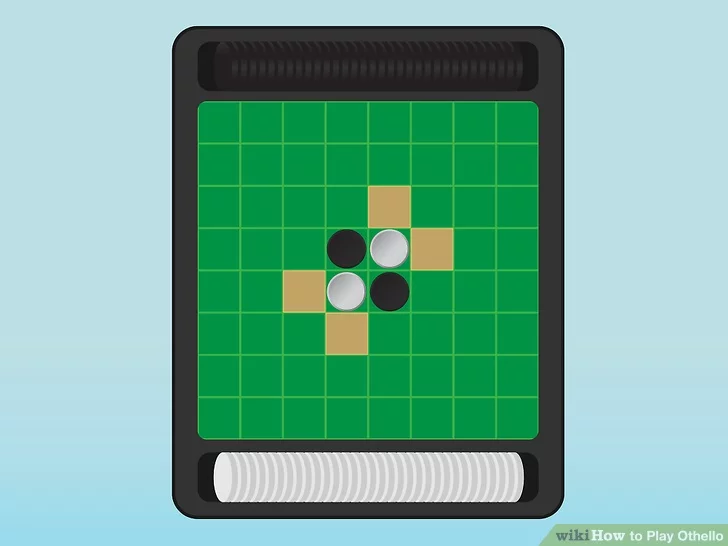


Flip the outflanked disc to its opposite side. Once a disc is outflanked, flip it over to the opposite color. This disc now belongs to you as long as it remains flipped on that side. However, the same disc may be turned over again if it is part of a row that is outflanked.

For example, if the disc was white before it was outflanked, then turn it to the black side after it is outflanked.

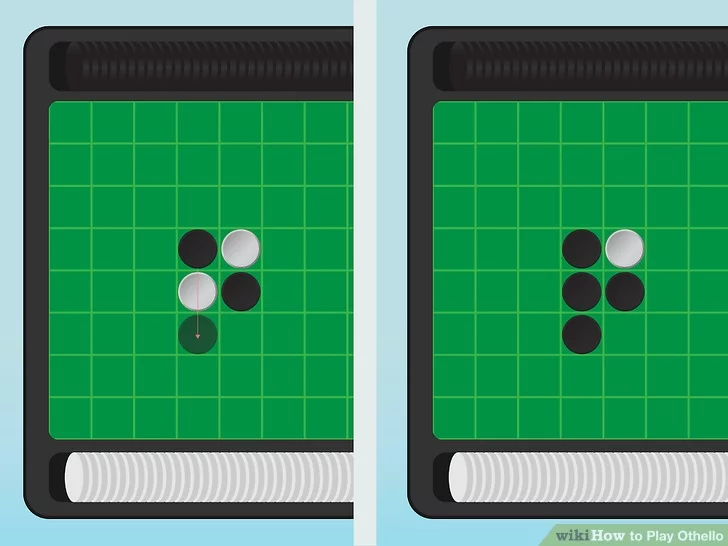

Pass the turn to your opponent to continue playing. Your opponent’s goal is also to place a disc in a spot that outflanks at least 1 of the first player’s discs. If the second player plays the white discs, they would place 1 of their discs at the end of a row. Your opponent should place their white disc so that a black disc is framed by 2 white discs on each side (or vice versa if you are playing white). Then, make sure your opponent flips the outflanked black disks to white.

Remember that the row can be horizontal, diagonal or vertical.

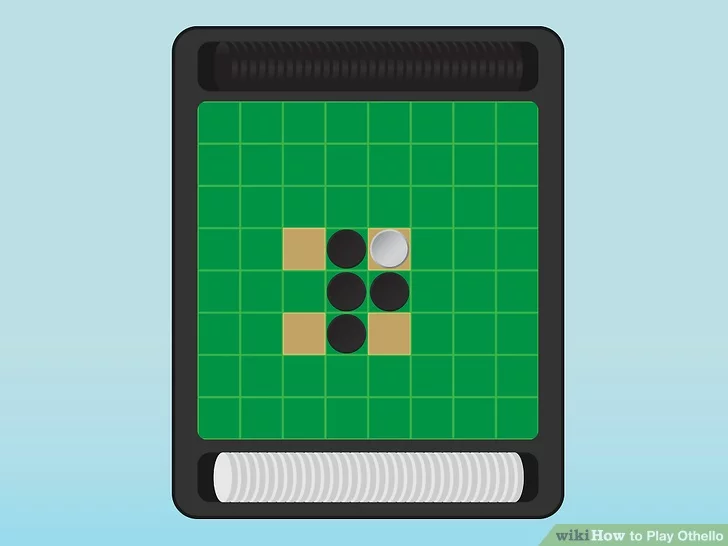

Continue taking turns placing discs until a legal move isn’t possible. Always place discs in a position where they can outflank a row of the opponent’s discs. If this isn't possible, you must forfeit your turn until you can perform a legal move.

If neither player can perform a legal move, then the game is over.
If a legal move is available, you may not forfeit your turn, even if it would be advantageous to do so.

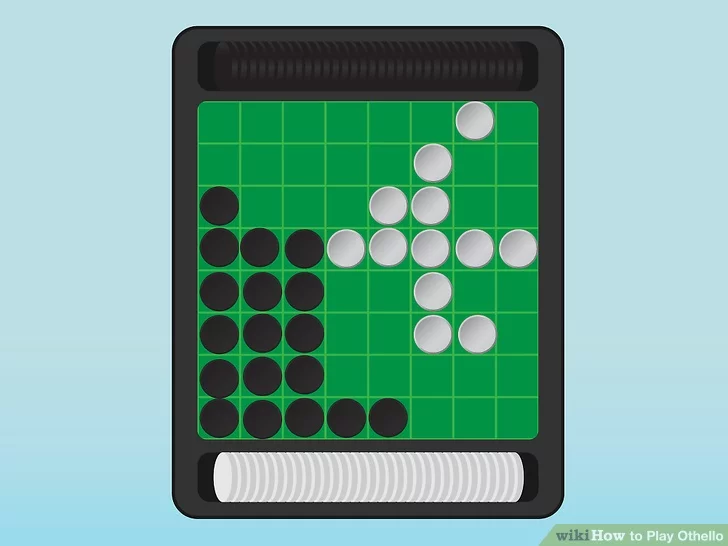

Count the number of discs of each color to determine a winner. Once there are no more legal moves, add up all of the discs of each color. The player with more discs of his color wins the game.

For example, if black has 23 discs on the board and white has 20 discs on the board, then black is the winner.

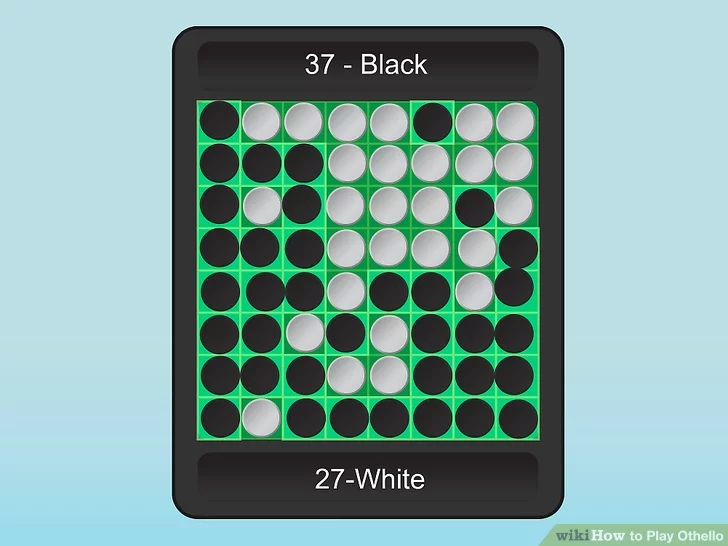

https://drive.google.com/file/d/1AHsVUYv9ON7Uij0nBtKUM9Jv2i_m2VlW/view

https://youtu.be/Ol3Id7xYsY4

https://youtu.be/fZfUd3utD5w

In [ ]:
import copy
global MAX, MIN
MAX=1000; MIN=-1000

In [ ]:
def GenNeighbours(cell):
  i=cell[0];j=cell[1]
  neighbours=[]
  if i>0 and j>0 and i<7 and j<7: neighbours = [[i-1,j-1],[i-1,j],[i-1,j+1],[i,j-1],[i,j+1],[i+1,j-1],[i+1,j],[i+1,j+1]]      # non-boundary cells
  elif  i==0 and j>0 and j<7:     neighbours = [[i,j-1],[i,j+1],[i+1,j-1],[i+1,j],[i+1,j+1]]                                  # top edge
  elif  i==7 and j>0 and j<7:     neighbours = [[i-1,j-1],[i-1,j],[i-1,j+1],[i,j-1],[i,j+1]]                                  # bottom edge
  elif  j==0 and i>0 and i<7:     neighbours = [[i-1,j],[i-1,j+1],[i,j+1],[i+1,j],[i+1,j+1]]                                  # left edge   
  elif  j==7 and i>0 and i<7:     neighbours = [[i-1,j-1],[i-1,j],[i,j-1],[i+1,j-1],[i+1,j]]                                  # right edge
  elif  i==0 and j==0:            neighbours = [[i,j+1],[i+1,j],[i+1,j+1]]                                                    # top left corner
  elif  i==0 and j==7:            neighbours = [[i,j-1],[i+1,j],[i+1,j-1]]                                                    # top right corner
  elif  i==7 and j==0:            neighbours = [[i,j+1],[i-1,j],[i-1,j+1]]                                                    # bottom left corner
  else:                           neighbours = [[i,j-1],[i-1,j],[i-1,j-1]]                                                    # bottom right corner

  return neighbours

In [ ]:
def outflanked(player,opponent,cell,board):                       # check if 'player' outflanks 'opponent' by placing his coin in the given 'cell' on the current 'board' 
  listt=[]                                                        # stores list of all positions where opponent is outflanked by player
  neighbours= GenNeighbours(cell)                                 # generate all 8 neighbours of the cell
  for n in neighbours:                                            # For each neighbour n in neighborhood of the cell
    p=0;q=0; collected=[]
    if board[n[0]][n[1]]==opponent:                                    # if opponent present in n
      [p,q]=[n[0]-cell[0],n[1]-cell[1]]                                # obtain direction vector [p,q] of opponent relative to the cell. N=[-1,0],E=[0,1],S=[1,0],W=[0,-1], NW=[-1,-1],NE=[-1,1],SE=[1,1],SW=[1,-1]
      [a,b]=cell ; outflank=False                                      # initialise [a,b]=cell
      ''''start searching along the direction vector [p,q] from n'''
      while a+p in range(8) and b+q in range(8):                       # while [a+p,b+q] is within range of the board
        [a,b] = [a+p,b+q]                                              # Update [a,b] to next block along the direction [p,q]                                                                       
        if board[a][b]!=player and board[a][b]!=opponent: break        # if [a,b] contains neither player nor opponent, EXIT search       ---> no outflanking possible
        elif board[a][b]==opponent: collected.append([a,b]); continue  # if [a,b] contains opponent, collect it  & proceed to next search ---> outflanking may still be possible in future                  
        else: outflank=True ; break                                    # if [a,b] contains player, note [a,b] and EXIT search.            ---> outflanked
      ''' list all positions of opponent outflanked by the 'cell' and the 'noted' cell'''  
      if outflank:
        for i in collected: listt.append(i)
      
  return listt    

In [ ]:
def findValidMoves(playerid,board):             # player = 1 for Black and -1 for Red, Board is the current board config
    moves=[]
    player=0
    if playerid=="B":player=1
    if playerid=="R":player=-1
    opponent=-player
    for i in range(8):
        for j in range(8):
          neighbours=[]
          if board[i][j]==opponent:               # check all 8 neighbours of opponent (=-player)
            neighbours = GenNeighbours([i,j])       
          for cell in neighbours:
            if board[cell[0]][cell[1]]!=player and board[cell[0]][cell[1]]!=opponent and cell not in moves and len(outflanked(player,opponent,cell,board)):
               moves.append(cell)

    return moves

In [ ]:
def flip(player,cell,board):
    # flip all coins of opponent that are outflanked
  c=0;
  out=outflanked(player,-player,cell,board)
  if len(out):
     for opp in out:
         board[opp[0]][opp[1]]=player
         #print_board(board)                       # Uncomment to see step-by-step game play flipping
         flip(player,opp,board)
  else:
    return
  return board

In [ ]:
def makeMove(move, player,PresentBoard):
  newboard=copy.deepcopy(PresentBoard)
  newboard[move[0]][move[1]]=player
  newboard=flip(player,move,newboard)
  return newboard

In [ ]:
def returnBestMove(board,player):
  PresentBoard=copy.deepcopy(board)
  if player==1: playerid="B"
  else: playerid="R"
  validMoves=findValidMoves(playerid,PresentBoard)
  print(validMoves)
  moves=[];scores=[];TargetDepth=3
  for eachmove in validMoves:
    currBoard=makeMove(eachmove,player,PresentBoard)
    if player==1: opp=-1
    else: opp=1
    s=minimax(opp,currBoard,TargetDepth,1,-1000,1000)
    #print(s)
    scores.append(s)
    moves.append(eachmove)
  bestscore=max(scores)
  bestmove=moves[scores.index(bestscore)]
  return bestmove

In [ ]:
def minimaxSearch(player,board):
  if player==1: playerid="B"; opp=-1
  else: playerid="R"; opp=1
  validMoves=findValidMoves(playerid,board); scores=[]
  #print(validMoves)
  TargetDepth=6
  for eachmove in validMoves:
    scores.append(minimax(opp,board,TargetDepth,1,-1000,1000))
  bestScore=min(scores); bestMove=validMoves[scores.index(bestScore)]
  return bestMove  

In [ ]:
def unitDepthSearch(player,board):
  if player==1: playerid="B"
  else: playerid="R"
  validMoves=findValidMoves(playerid,board); scores=[]
  #print(validMoves)
  if len(validMoves)!=0:
    for eachmove in validMoves:
      newBoard=makeMove(eachmove,player,board)
      scores.append(getScore(newBoard,player))
    bestScore=max(scores);bestMove=validMoves[scores.index(bestScore)]
    return bestMove
  else: print("No valid moves. Pass the turn")

In [ ]:
def getScore(board,player):
  score=0
  if player==1: playerid=1
  else: playerid=-1
  for i in range(8):
    for j in range(8):
      #print(str(i) + "" + str(j))
      if board[i][j]==playerid: score+=1
  return score

In [ ]:
def minimax(player,board,TargetDepth,currentDepth,alpha,beta):
  if currentDepth==TargetDepth:
    #return evaluate(board,player)
    return evaluate(board,player)
  if player==1:
    bestscore=MIN
    moves=findValidMoves("B",board)
    for eachmove in moves:
      currBoard=makeMove(eachmove,player,copy.deepcopy(board))
      val=minimax(-player,currBoard,TargetDepth,currentDepth+1,alpha,beta)
      #print(eachmove)
      bestscore=max(val,bestscore)
      alpha = max(alpha, bestscore)  
  
      if alpha>=beta:
        break
 
    return bestscore
  else:
    bestscore=MAX
    moves=findValidMoves("R",board)
    for eachmove in moves:
      currBoard=makeMove(eachmove,player,copy.deepcopy(board))
      val=minimax(-player,currBoard,TargetDepth,currentDepth+1,alpha,beta)
      #print(eachmove)
      bestscore = min(bestscore, val)  
      beta = min(beta, bestscore)
 
      if alpha>=beta:
        break
 
    return bestscore

In [ ]:
def evaluate (CurrBoard,player):
    point = 0; player_front_tiles=opp_front_tiles=0
    #find the color of the opponent
    if player==1: opp = -1
    else: opp=1
    for row in range(8):
        for col in range(8):
            #calculate the point of current player
            if CurrBoard[row][col] == player:
                point += gradingStrategy[row][col]
            #calculate the point of the opponent
            elif CurrBoard[row][col] == opp:
                point -= gradingStrategy[row][col]

    return point

# HEURISTIC EVALUATION FUNCTIONS

In [ ]:
"""
gradingStrategy = [
    [100, -10,  10,   3,   3,  10, -10, 100],
    [-10, -20,  -3,  -3,  -3,  -3, -20, -10],
    [10,  -3,   8,   1,   1,   8,  -3,  10],
    [3,  -3,   1,   1,   1,   1,  -3,   3],
    [3,  -3,   1,   1,   1,   1,  -3,   3],
    [10,  -3,   8,   1,   1,   8,  -3,  10],
    [-10, -20,  -3,  -3,  -3,  -3, -20, -10],
    [100, -10,  10,   3,   3,  10, -10, 100],
]
"""
"""
gradingStrategy=[
      [20, -3, 11, 8, 8, 11, -3, 20],
    	[-3, -7, -4, 1, 1, -4, -7, -3],
    	[11, -4, 2, 2, 2, 2, -4, 11],
    	[8, 1, 2, -3, -3, 2, 1, 8],
    	[8, 1, 2, -3, -3, 2, 1, 8],
    	[11, -4, 2, 2, 2, 2, -4, 11],
    	[-3, -7, -4, 1, 1, -4, -7, -3],
    	[20, -3, 11, 8, 8, 11, -3, 20],
]
"""
gradingStrategy=[
      [100, -20, 10, 5, 5, 10, -20, 100],
    	[-20, -50, -2, -2, -2, -2, -50, -20],
    	[10, -2, -1, -1, -1, -1, -2, 10],
    	[5, -2, -1, -1, -1, -1, -2, 5],
    	[5, -2, -1, -1, -1, -1, -2, 5],
    	[10, -2, -1, -1, -1, -1, -2, 10],
    	[-20, -50, -2, -2, -2, -2, -50, -20],
    	[100, -20, 10, 5, 5, 10, -20, 100],
]

X1 = [-1, -1, 0, 1, 1, 1, 0, -1]
Y1 = [0, 1, 1, 1, 0, -1, -1, -1]

def evaluate_new (CurrBoard,player):
    point = 0; player_front_tiles=opp_front_tiles=0;player_tiles=opp_tiles=0
    #find the color of the opponent
    if player==1: opp = -1
    else: opp=1
    for row in range(8):
        for col in range(8):
            #calculate the point of current player
            if CurrBoard[row][col] == player:
                point += gradingStrategy[row][col]; player_tiles+=1
            #calculate the point of the opponent
            elif CurrBoard[row][col] == opp:
                point -= gradingStrategy[row][col]; opp_tiles+=1

            """ New lines added to count frontier disks"""
            if CurrBoard[row][col]!=0:
              for k in range(8):
                x=row+ X1[k]; y=col + Y1[k]
                if x>=0 and x<8 and y>=0 and y<8 and CurrBoard[x][y]==0:
                  if CurrBoard[row][col]==player: player_front_tiles+=1
                  else: opp_front_tiles+=1
                  break

    if player_tiles>opp_tiles: p=(100*player_tiles)/(player_tiles + opp_tiles)
    elif player_tiles<opp_tiles: p=-(100*opp_tiles)/(player_tiles + opp_tiles)
    else: p=0

    if player_front_tiles>opp_front_tiles: f= -(100*player_front_tiles)/(player_front_tiles + opp_front_tiles)
    elif player_front_tiles<opp_front_tiles: f= (100*opp_front_tiles)/(player_front_tiles + opp_front_tiles)
    else: f=0

    return (point,p,f)

In [ ]:
#Mobility of player compared to its opponent
def mobility(currBoard,player):
  if player==1: player_id="B"; opp_id="R"
  else: player_id="R"; opp_id="B"

  myTiles=len(findValidMoves(player_id,currBoard))
  oppTiles=len(findValidMoves(opp_id,currBoard))
  if myTiles>oppTiles : m=(100*myTiles)//(myTiles+oppTiles)
  elif myTiles<oppTiles: m=-(100*oppTiles)//(myTiles + oppTiles)
  else: m=0
  return m

In [ ]:
#Corner closeness
def closeness(currboard,player):
  if player==1:my_color=1; opp_color=-1
  else: my_color=-1; opp_color=1           #-1 is red; 1 is black

  my_tiles=opp_tiles=0  
  if (currboard[0][0]==0):
    if (currboard[0][1]==my_color): my_tiles+=1
    elif (currboard[0][1] == opp_color): opp_tiles+=1
    if (currboard[1][1] == my_color): my_tiles+=1
    elif (currboard[1][1] == opp_color): opp_tiles+=1
    if (currboard[1][0] == my_color): my_tiles+=1
    elif (currboard[1][0] == opp_color): opp_tiles+=1
    
  if (currboard[0][7] == 0):
    if (currboard[0][6] == my_color): my_tiles+=1
    elif (currboard[0][6] == opp_color): opp_tiles+=1
    if (currboard[1][6] == my_color): my_tiles+=1
    elif (currboard[1][6] == opp_color): opp_tiles+=1
    if (currboard[1][7] == my_color): my_tiles+=1
    elif (currboard[1][7] == opp_color): opp_tiles+=1
  
  if (currboard[7][0] == 0):
   if (currboard[7][1] == my_color): my_tiles+=1
   elif (currboard[7][1] == opp_color): opp_tiles+=1
   if (currboard[6][1] == my_color): my_tiles+=1
   elif (currboard[6][1] == opp_color): opp_tiles+=1
   if (currboard[6][0] == my_color): my_tiles+=1
   elif (currboard[6][0] == opp_color): opp_tiles+=1
   
  if (currboard[7][7] == 0):
    if (currboard[6][7] == my_color): my_tiles+=1
    elif (currboard[6][7] == opp_color): opp_tiles+=1
    if (currboard[6][6] == my_color): my_tiles+=1
    elif (currboard[6][6] == opp_color): opp_tiles+=1
    if (currboard[7][6] == my_color): my_tiles+=1
    elif (currboard[7][6] == opp_color): opp_tiles+=1
	
  
  l = -12.5 * (my_tiles - opp_tiles);
  return l

In [ ]:
#Corner occupancy
def corner_occupancy(currboard,player):
  if player==1:my_color=1; opp_color=-1
  else: my_color=-1; opp_color=1
  my_tiles = opp_tiles = 0               #-1 is red and +1 is black
  
  if (currboard[0][0] == my_color): my_tiles+=1
  elif (currboard[0][0] == opp_color): opp_tiles+=1
  if (currboard[0][7] == my_color): my_tiles+=1
  elif (currboard[0][7] == opp_color): opp_tiles+=1
  if (currboard[7][0] == my_color): my_tiles+=1
  elif (currboard[7][0] == opp_color): opp_tiles+=1
  if (currboard[7][7] == my_color): my_tiles+=1
  elif (currboard[7][7] == opp_color): opp_tiles+=1
  c = 25 * (my_tiles - opp_tiles)
  return c

In [ ]:
def weighted_evaluation(currboard,player):
  [d,p,f]=evaluate_new(currboard,player)
  score = (801.724*corner_occupancy(currboard,player)) + (382.026*closeness(currboard,player)) + (78.922*mobility(currboard,player)) + (10*p) + (74.396*f) + (10*d)
  return score

# **INITIALISING THE GAME**

In [ ]:
dim=8; board=[]
#1 is black, -1 is red
def init ():
    for i in range(dim):
        board.append([])
        for j in range(dim):
            board[i].append(0)
    board[3][3] = 1
    board[3][4] = -1
    board[4][3] = -1
    board[4][4] = 1
    return board

def print_board (state):
    print ("    0   1   2   3   4   5   6   7")
    print ("  +---+---+---+---+---+---+---+---+")
    c = 0
    for i in range(dim):
        print (i, "|",end=' ')
        for j in range(dim):
            c = state[i][j]
            if c == 0:
                print (" ",end=' ')
            #elif c == 5:
             #   print ("*",end=' ')
            elif c == 1:
                print ("B",end=' ')
            else:
                print ("R",end=' ')
            print ("|",end=' ')
        print (" ")
        print ("  +---+---+---+---+---+---+---+---+")
init()

print_board(board)
print(findValidMoves("R",board))
minimaxSearch(0,board)

    0   1   2   3   4   5   6   7
  +---+---+---+---+---+---+---+---+
0 |   |   |   |   |   |   |   |   |  
  +---+---+---+---+---+---+---+---+
1 |   |   |   |   |   |   |   |   |  
  +---+---+---+---+---+---+---+---+
2 |   |   |   |   |   |   |   |   |  
  +---+---+---+---+---+---+---+---+
3 |   |   |   | B | R |   |   |   |  
  +---+---+---+---+---+---+---+---+
4 |   |   |   | R | B |   |   |   |  
  +---+---+---+---+---+---+---+---+
5 |   |   |   |   |   |   |   |   |  
  +---+---+---+---+---+---+---+---+
6 |   |   |   |   |   |   |   |   |  
  +---+---+---+---+---+---+---+---+
7 |   |   |   |   |   |   |   |   |  
  +---+---+---+---+---+---+---+---+
[[2, 3], [3, 2], [4, 5], [5, 4]]


[2, 3]

# PLAY GAME

In [ ]:
import copy
table=copy.deepcopy(board)
while(True):
  player=1;b=findValidMoves("B",table);#print(b)
  if len(b)!=0:
    print("Black's turn")
    black_move=minimaxSearch(player,table);print(black_move)
    table=makeMove(black_move,player,table)
    print_board(table)
  print("Your turn")
  opp=-1;r=findValidMoves("R",table);print(r)
  if len(r)!=0:
    opp_move=list(map(int,input().split()))
    table=makeMove(opp_move,opp,table)
    print_board(table)
  if len(b)==0 and len(r)==0:
    print("GAME OVER!!!")
    print("Bot's score = " + str(getScore(table,1)))
    print("Your score = " + str(getScore(table,0)))
    break
     